we are going to take following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### Problem definition
In a statement,
> Given a clinical parameter about a patient,can we predict whether or not they have heart disease ?


### data



The original data came from the UCI Machine Learning Repository.
There is also version of it available in kaggle

### evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept ,we'll pursue the project

### features
This is where you'll get all information about each of your features of your data

## preparaing the tool
We're going to use pandas ,Matplotlib and Numpy for data anaysis and manipp=ulation

In [3]:
#import all the tool
#regular EDA(exploratory data analysis)and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 # we want our plots to appear inside the notebook
%matplotlib inline

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve



In [4]:
##Load data
df=pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Data exploration
The goal here is to find out more about the data and become a subject matter expert on dataset you're working with it
1. what questions are you trying to solve?
2. what kind of data do we have and how we treat different types?
3. whats missing from the data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add change or remove features to get more out of your data

In [5]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df["target"].value_counts() # balanced problem.both classes has equal typ of example

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

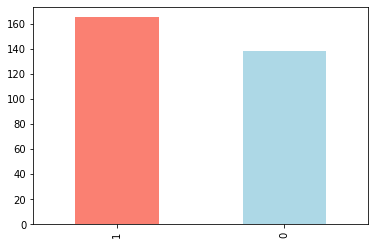

In [8]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#are there any missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to Sex

In [12]:
df.sex.value_counts() #male=1,female=0

1    207
0     96
Name: sex, dtype: int64

In [13]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

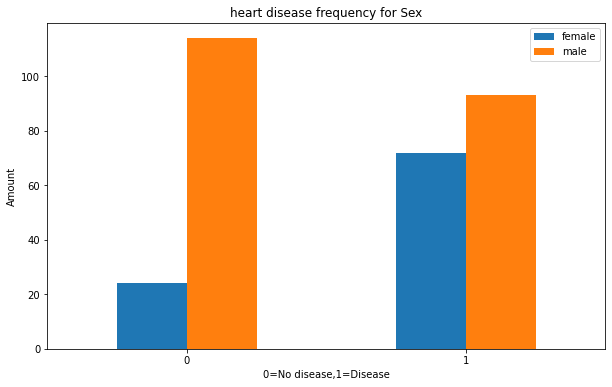

In [14]:
# create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6))

plt.title("heart disease frequency for Sex")
plt.xlabel("0=No disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["female","male"])
plt.xticks(rotation=0)


In [15]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### age vs max heart rate for Heart Disease

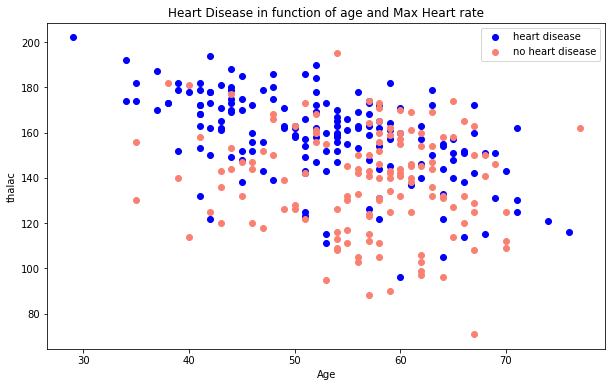

In [16]:
# create another figure
plt.figure(figsize=(10,6))
# scatter with positive example
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],
c="blue")
#scatter with negative example(no heart disease)
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],
           color="salmon")
plt.legend(["heart disease","no heart disease"])
plt.xlabel("Age")
plt.ylabel("thalac")
plt.title("Heart Disease in function of age and Max Heart rate");


<AxesSubplot:ylabel='Frequency'>

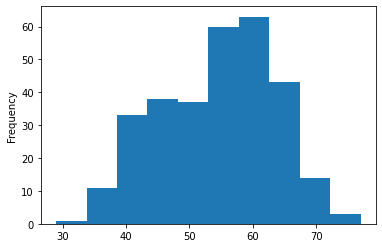

In [17]:
#Check the distribution the age column with a histogram
df.age.plot.hist() #normal distribution

 ## Heart disease frequency per chest pain type

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


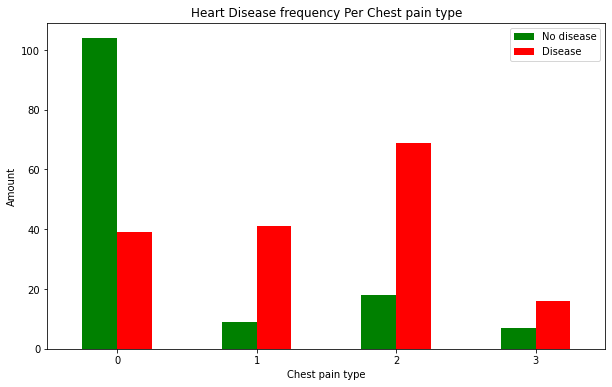

In [19]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                 color=["green","red"])
plt.title("Heart Disease frequency Per Chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"]);
plt.xticks(rotation=1);

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# buildinf correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


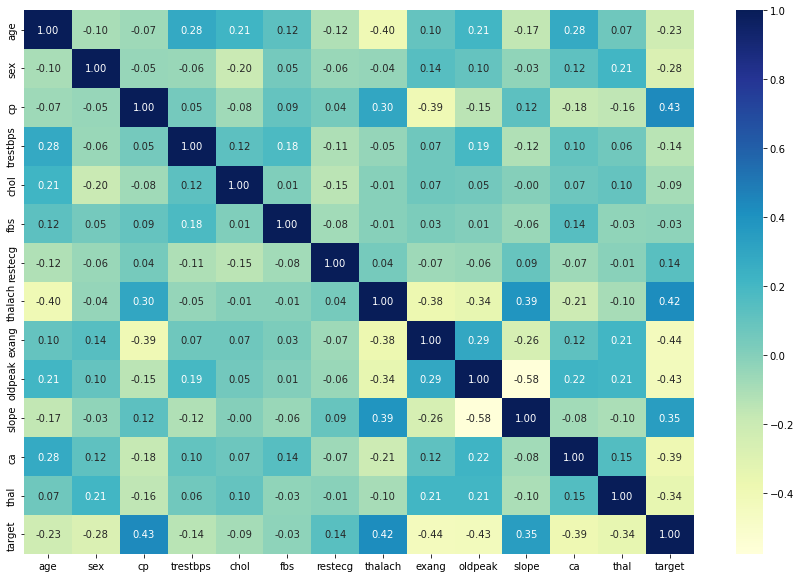

In [22]:
#lets make out correlation matrix a little prettier
corr_matrx=df.corr()
fig,ax=plt.subplots(figsize=(15,10))

ax=sns.heatmap(corr_matrx,
               annot=True,
               fmt=".2f",
               cmap="YlGnBu"
              );

# negative correlation=a relationship between two variables which one variable increase as the other variable decrease

<AxesSubplot:xlabel='exang'>

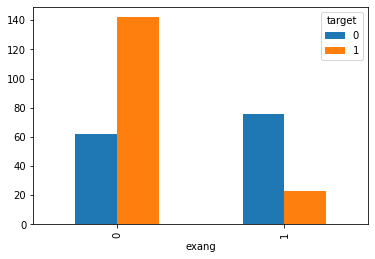

In [23]:
pd.crosstab(df["exang"],df["target"]).plot(kind="bar")

### 5. modelling

In [25]:
X=df.drop("target",axis=1)
y=df["target"]
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,  
                                              test_size=.2)

Now we've got our data split into training and test sets.Its time to build a ml model

We'll train it(find the patterns) on the training set

we'll test it(use the pattern) on the test set

we are going to try 3 different models
1. logistic regression
2. K-nearest neighbours classifier
3. Random forest classifier

In [26]:
#put model into a dictionary
models={"logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random forest":RandomForestClassifier()}

def fit_and_score(model,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates ml model.
    
    """
    #set random seed
    np.random.seed(42)
    #make a dict to keep model score
    model_scores={}
    #loop through models
    for name,model in models.items():
        model.fit(X_train,y_train)
        
        #Evaluate the model and append its score to model score
        
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [27]:
model_scores=fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores;

H:\3-1\data_science\project_practice\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

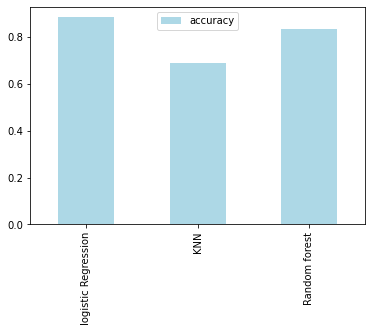

In [28]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar(color="lightblue")
#model_compare
model_scores

Now we've got a basleline model.and we know a models first prediction arenot always what we should based our next step off. 

Lets look out the following
* Hyperparameter tuning
* Feature  importance
* Confusion matrix
* Cross-validation
* Precission
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(AUC)

### Hyperparameter tuning(by hand)


In [29]:
#lets tune knn
train_scores=[]
test_scores=[]
#Create a list of different values for n neighbours

neighbors=range(1,21)

knn=KNeighborsClassifier()

#loop through differnet n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    #fit the algo
    knn.fit(X_train,y_train)
    
    #update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [30]:
max(test_scores)

0.7540983606557377

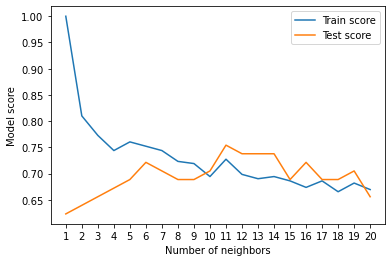

In [31]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.xticks(np.arange(1,21,1))
plt.legend()

## Hyperparameter tuning with Randomized Search CV

We're going to tune:
* LogisticRegression()
* RandomForestClassfier()

... Using RandomizedSearchCV

In [32]:
# create a hyperparameter grid for Logisticregression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
#np.logspace(-4,4,20)
# Create a hyperparameter grid for RandomForestClassifer
rf_grids={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
         }


NOw've got hyperparameter grids for each of our models,Lets tune them using Randomized searchcv

In [33]:
#Tune logistic regression
np.random.seed(42)

#Setup random hyperparameter search fot logisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True
                             )

#Fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now've tuned logisctic regression(),lets do the same for RandomForestClassifier

In [36]:
#setup random seed
# np.random.seed(42)
# #Setup random hyperparameter search for RandomForestClassifier
# rs_rf=RandomizedSearchCV(RandomForestClassifier(),
#                         param_distributions=rf_grids,
#                            cv=5,
#                              n_iter=20,
#                              verbose=True)
# rs_rf.fit(X_train,y_train)

In [37]:
#Find the best hyperparameter
# rs_rf.best_params_

In [38]:
# rs_rf.score(X_test,y_test)

In [39]:
# model_scores

## Hyperparamet tune with gridSearchCv logistic regresson
Since out LogisticRegression model provides best scores so far,we'll try and improve then again using GridSearchCV

In [40]:
#Different hyperparameter for our logistic regression model
log_reg_grid= {"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

#setup grid hyperparameter search for Logistic Regression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
#FIT grid hyperparameter search model

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [42]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

## Evaluate our tuned ml classifier,beyond accuracy
* ROC curve
* Confusion matric
* Classification report
* Precission
* Recall
* F1-score

and it would be great if cross -validatiob was used where possible

To make comparison and evaluate our trained model,first we need to make prediction

In [43]:
#Make prediction with tuned model
y_preds=gs_log_reg.predict(X_test)

In [44]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
y_test.head()


179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

H:\3-1\data_science\project_practice\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


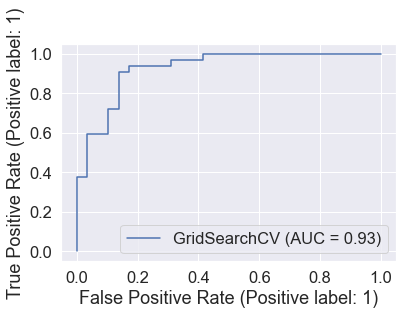

In [46]:
#import roc curve function from the sklearn metrics
#plot roc curve and calculate auc metriccs
plot_roc_curve(gs_log_reg,X_test,y_test)

In [47]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


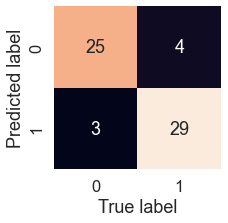

In [45]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking confusion matrix using seaborn heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    x=sns.heatmap(confusion_matrix(y_test,y_preds),
                 annot=True,
                  cbar=False
                 )
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)

Now we 've got roc curve ,an AUC matriix,lets get classification report as well as cross validatied precosiion,recall and f1 score'

In [58]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross validation
We're going calculate precision,recall,f1 score of our cross validation and to do so we'll be using `cross_cal_score()`

In [48]:
# check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
#create a new classifier with the best parameters
clf=LogisticRegression(C=0.20433597178569418,
                      solver= "liblinear")
                       

In [54]:
#cross validated accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [56]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [59]:
#cross validated precission
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [60]:
#cross validated recall
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [61]:
#cross validated f1
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

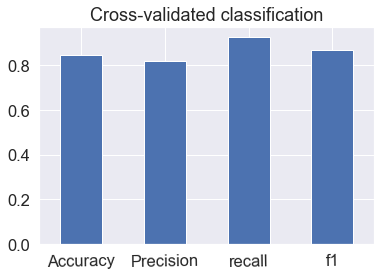

In [72]:
#visualize our cross-validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                       "Precision":cv_precision,
                       "recall":cv_recall,
                       "f1":cv_f1},index=[0])
cv_metrics.T.plot(kind="bar",legend=False,title="Cross-validated classification")
plt.xticks(rotation="1");


## feature importance

feature importance is another as asking ,"Which features conributed most to the outcomes of the model and how did they contribute"

FInding feature importance is different in each ml model.One way to find feature importance is to search for("Model name") feature importance

Lets find the feature importance for out LogisticRegression model...

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
#Fit an instance of logisic regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [76]:

clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [77]:
#check coef_
clf.coef_

array([[ 0.00316728, -0.86044636,  0.66067051, -0.01156993, -0.00166374,
         0.04386116,  0.31275829,  0.02459361, -0.60413071, -0.56862818,
         0.45051626, -0.63609888, -0.67663381]])

In [79]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
#match coef's feature to column
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict


{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

<AxesSubplot:title={'center':'Feature importance'}>

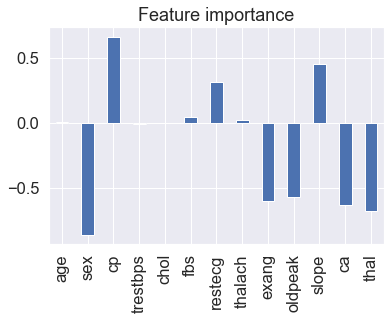

In [80]:
#visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(legend=False,title="Feature importance")

In [81]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [82]:
#sex is strogly ngtv correlation with target.sex increse corrrelation decrease

In [83]:
#slop increase target also increase
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6 experiment

If you havenot hit your evaluation metric yet.. ask yoursel...
* could you colllect more data
* Could you try a better model?like Catboost or XGBoost?
* ould you improve current model?(beyond what we've done so far)
* If your model is good enough (You have hit your evaluation metric) how would you export and share it other?
* 